# Сегментация клиентов банка «Метанпром» по потреблению продуктов и оттоку


Сcылка на презентацию: https://dropmefiles.com/SvcCT 

https://drive.google.com/file/d/1991wo0vslbImRVukpLI4zIn3awd09upP/view?usp=sharing                  
    
Ссылка на дашборд: https://public.tableau.com/app/profile/pavel8505/viz/-_16805283893940/Sheet1?publish=yes   

## Описание исследования

Источник данных: `bank_dataset.csv`

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле, Ростове Великом и Рыбинске.



Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Цели и Задачи исследования 

Проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток.

- Сегментировать пользователей на основе данных о количестве потребляемых продуктов
- Сформулировать и проверьте статистические гипотезы
    
   1. Проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые       пользуются одним.
   2. Проверить гипотезу различия оттока между клиентами с кредитной картой и без.
   

- Дать выводы и рекомендации по удержанию 

- Подготовить презентацию для клиента

### Этапы исследования

1. Предобработка данных
2. Исследовательский анализ данных
3. Исследовать пользователей склонных к октоку
4. Сегментация пользователей на основе данных о количестве потребляемых продуктов
5. Формулировка и проверка гипотез
6. Формирование данных и запуск дашборда
7. Выводы и рекомендации по удержанию
8. Подготовка презентации

## Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth

Прочитаем и запишем данные в переменную `data`, путь до файла сохраним в переменной `path`. 

Сразу приведем колонки к нижнему регистру и поменяем часть наименований.  

In [2]:
path = '/bank_dataset.csv'
data = pd.read_csv(path)
data = data.rename(columns = {'userid':'user_id'})
data.columns = data.columns.str.lower()
data.head(10)

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
dnan = data[data['balance'].isna()].drop(columns = 'balance')
display(dnan.groupby('city').agg({'user_id':'count','churn':'sum'}))
display(dnan.groupby('gender').agg({'user_id':'count','churn':'sum'}))
display(dnan.groupby('products').agg({'user_id':'count','churn':'sum'}))
display(dnan.groupby('churn').agg({'user_id':'count'}))
display(dnan.groupby('loyalty').agg({'user_id':'count','churn':'sum'}))
display(dnan.groupby('creditcard').agg({'user_id':'count','churn':'sum'}))

,user_id,churn
city,,
Рыбинск,1199,163
Ярославль,2418,337


,user_id,churn
gender,,
Ж,1654,290
М,1963,210


,user_id,churn
products,,
1,905,338
2,2600,86
3,98,62
4,14,14


,user_id
churn,
0,3117
1,500


,user_id,churn
loyalty,,
0,1744,320
1,1873,180


,user_id,churn
creditcard,,
0,1025,148
1,2592,352


<AxesSubplot:>

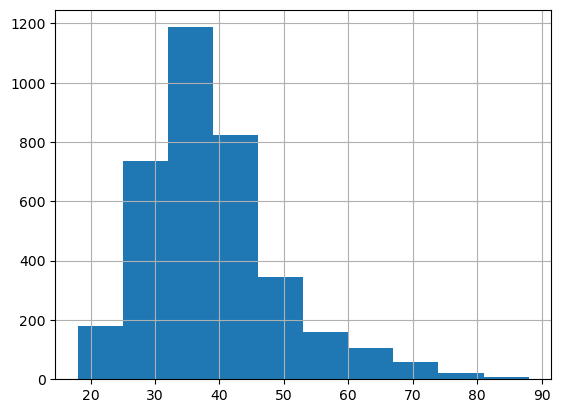

In [5]:
dnan['age'].hist()

<AxesSubplot:>

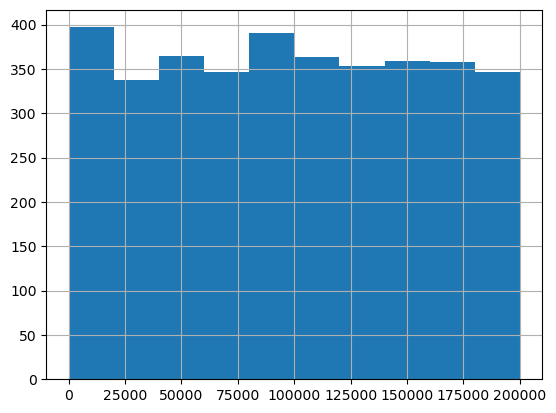

In [6]:
dnan['estimated_salary'].hist()

Наблюдаем, что данные по `balance` отсутствуют в Ярославле и Рыбинске, без ЗП примерно 50% пользователей из этих городов. Можно было бы считать, что это просто нулевой баланс, но на счету редко бывает именно ноль, плюс в Ростове таких пропусков нет. Зависимостей от других параметров в пропусках не обнаружилось. Еще предположить, что это новые клиенты, но среди них есть разорвавшие договор. Может потеря данных.

в остальном данные выглядят прилично - менять тип переменных не нужно. 

In [7]:
data.describe()

,user_id,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:ylabel='estimated_salary'>

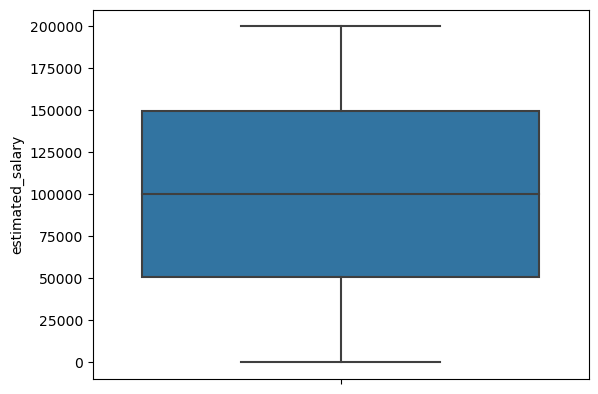

In [8]:
sns.boxplot(y = data['estimated_salary'])

есть низкие зарплаты, но после проверки на выбросы в рамках данного исследования выбросом это считать нельзя.

In [9]:
##data = data.fillna(0)
data.duplicated().sum()

0

Очевидных дубликатов нет.

In [10]:
data['user_id'].duplicated().sum()

0

дубликатов в айди нет

In [11]:
data.drop(columns = 'user_id').duplicated().sum()

0

неочевидных дубликатов без АЙДИ - нет

In [12]:
data.loc[data['objects'].isin([0]), 'objects'] = '0'
data.loc[data['objects'].isin(range(1,4)), 'objects'] = '1-3'
data.loc[data['objects'].isin(range(4,7)), 'objects'] = '4-6'
data.loc[data['objects'].isin(range(7,11)), 'objects'] = '7+'

Сделаем категоризацию по кол-ву объектов недвижимости.

In [13]:
data

,user_id,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,1-3,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1-3,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,7+,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1-3,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,1-3,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,4-6,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,7+,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7+,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,1-3,75075.31,2,1,0,92888.52,1


##  Исследовательский анализ данных

In [14]:
data_n = data[['score','age','balance','estimated_salary']]
data_n.columns = ['кредитная оценка','Возраст','Баланс счета','Заработная плата']
data_n

,кредитная оценка,Возраст,Баланс счета,Заработная плата
0,619,42,NaN,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,NaN,93826.63
4,850,43,125510.82,79084.10
...,...,...,...,...
9995,771,39,NaN,96270.64
9996,516,35,57369.61,101699.77
9997,709,36,NaN,42085.58
9998,772,42,75075.31,92888.52


Исследуем данные выраженные в кол-ве.

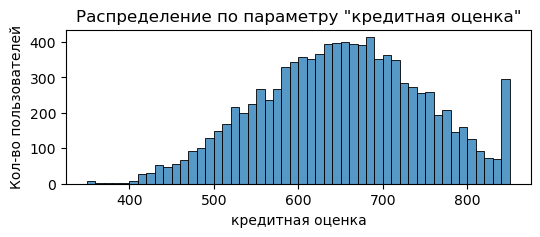

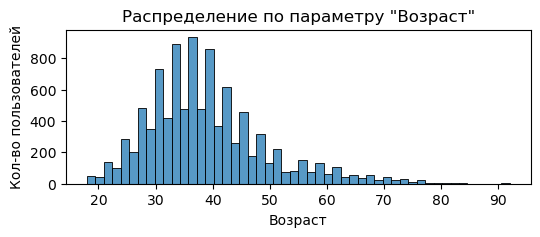

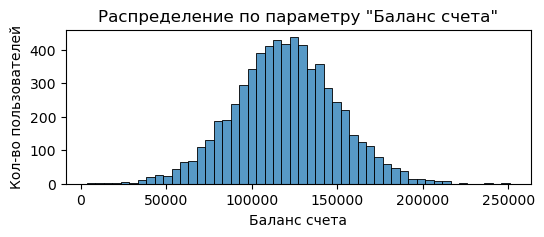

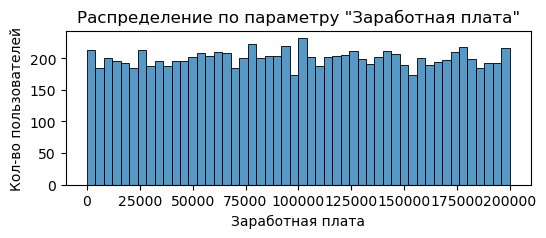

In [15]:
for c in data_n.columns:
    plt.figure(figsize=(6, 2))
    sns.histplot(data_n[c],bins = 50)
    plt.title(f'Распределение по параметру "{c}"')
    plt.xlabel(c)
    plt.ylabel('Кол-во пользователей')
    plt.show

In [16]:
data['score'].max()

850

In [17]:
data_c = data[['city','gender','objects','products','creditcard','loyalty','churn']]
data_c.columns = ['Город','Пол','Кол-во объектов собственности','Кол-во используемых продуктов','Наличие кредитной карты','Лояльность','Отток']
data_c

,Город,Пол,Кол-во объектов собственности,Кол-во используемых продуктов,Наличие кредитной карты,Лояльность,Отток
0,Ярославль,Ж,1-3,1,1,1,1
1,Рыбинск,Ж,1-3,1,0,1,0
2,Ярославль,Ж,7+,3,1,0,1
3,Ярославль,Ж,1-3,2,0,0,0
4,Рыбинск,Ж,1-3,1,1,1,0
...,...,...,...,...,...,...,...
9995,Ярославль,М,4-6,2,1,0,0
9996,Ярославль,М,7+,1,1,1,0
9997,Ярославль,Ж,7+,1,0,1,1
9998,Ростов Великий,М,1-3,2,1,0,1


Исследуем данные выраженные в категориях

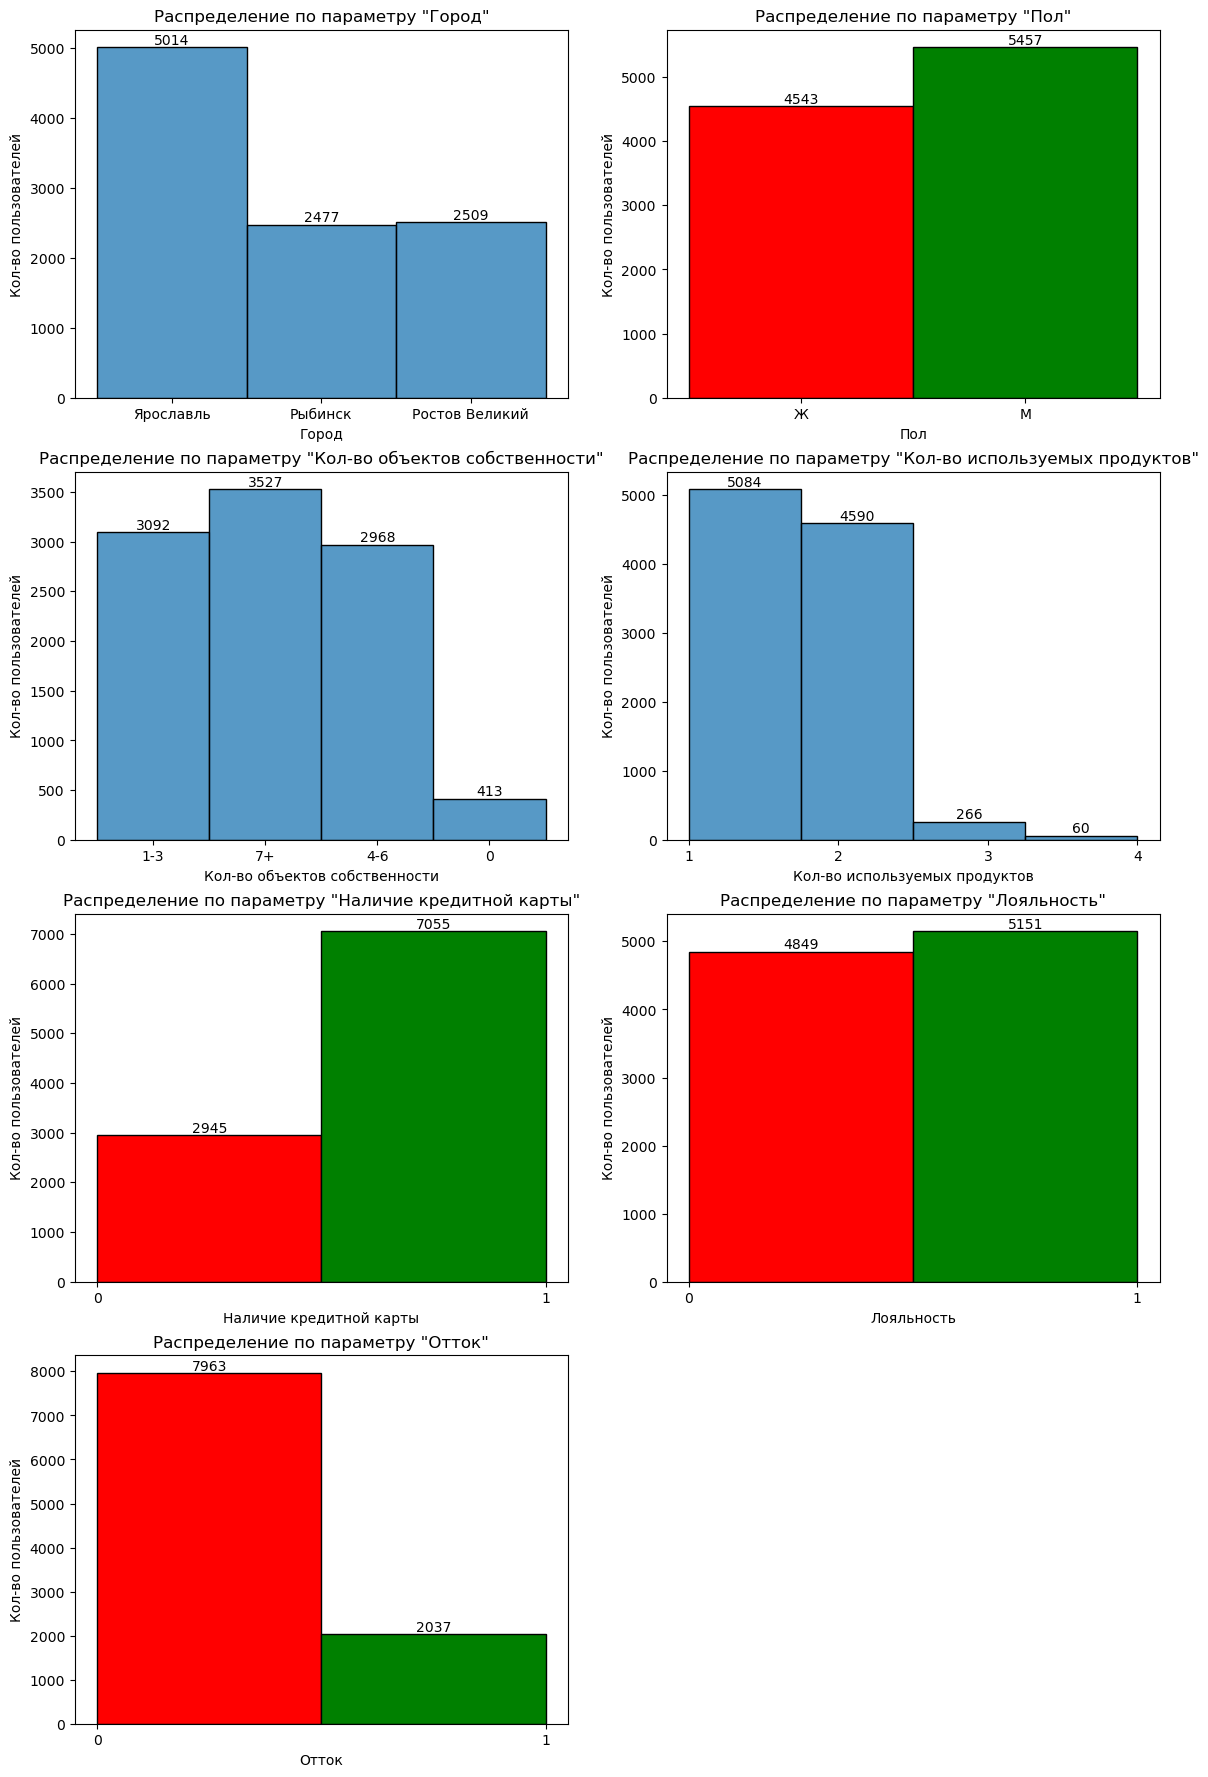

In [18]:
n = 0
plt.figure(figsize=(14, 22))
for c in data_c.columns:
    n += 1
    plt.subplot(4,2,n)
    p = sns.histplot(x = data_c[c], bins = data_c[c].nunique())
    p.set_xticks(data_c[c].unique(), data_c[c].unique())
    plt.title(f'Распределение по параметру "{c}"')
    plt.xlabel(c)
    plt.ylabel('Кол-во пользователей')
    plt.bar_label(p.containers[0])
    if data_c[c].nunique() == 2:
        p.patches[0].set_facecolor('red')
        p.patches[1].set_facecolor('green')    

Рапределения:

Кредитная оценка, возраст, баланс счета - распределение нормальное. На кредитной оценке есть аномалия на 850, ее можно объяснить тем, что это максимально возможная оценка.

Заработная плата - распределение равномерное, что странно - нужно задать вопрос.

Распределения:

По городу - Больше всего клиентов в Ярославле, примерно половина от общего кол-ва, Ростов и Рыбинск деляет оставшуются половина так же на примерно равные части.

По полу - мужчин больше, распределение м/ж примерно 54-55% на 45-46%.

По кол-ву объектов собственности - распределение равномерное, что странно, как с ЗП.

Распределение по используемым продуктам - 51% используют только один продукт, 46% два продукта, остальное приходится на 3-4 продукта.

У 70% пользователей есть кредитная карта банка.

Большая часть клиентов лояльны 51,5%

Отток средний по данным - 20%

In [19]:
data_for_corr = pd.get_dummies(data.drop(columns = ['user_id', 'age','gender']), columns = ['city'], drop_first= False)
data_for_corr = data_for_corr.rename(columns = {'city_Ростов Великий':'Ростов Великий', 'city_Рыбинск':'Рыбинск', 'city_Ярославль':'Ярославль'})
data_for_corr.corr()

,score,balance,products,creditcard,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль
score,1.000000,-0.004744,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.008928
balance,-0.004744,1.000000,-0.001027,0.006721,-0.020418,-0.001856,0.017208,-0.002604,-0.000208,0.002759
products,0.012238,-0.001027,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,0.001230
creditcard,-0.005458,0.006721,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.002467
loyalty,0.025651,-0.020418,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.003317
estimated_salary,-0.001384,-0.001856,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.003332
churn,-0.027094,0.017208,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.104955
Ростов Великий,0.005538,-0.002604,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.580359
Рыбинск,0.004780,-0.000208,0.009039,-0.013480,0.016732,-0.006482,-0.052667,-0.332084,1.000000,-0.575418
Ярославль,-0.008928,0.002759,0.001230,0.002467,0.003317,-0.003332,-0.104955,-0.580359,-0.575418,1.000000


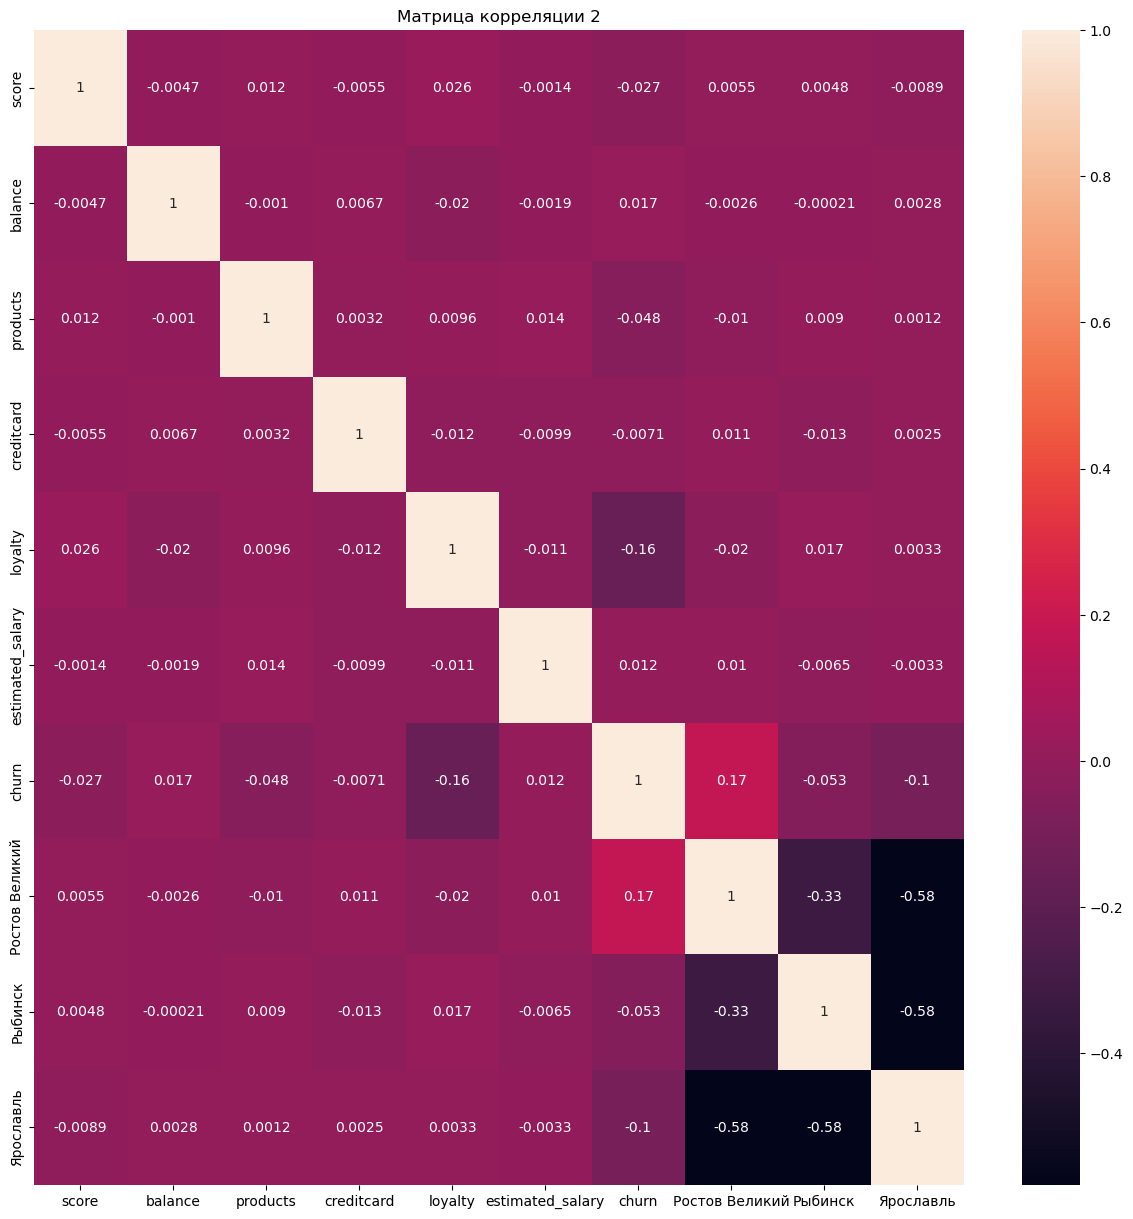

In [20]:
plt.figure(figsize = (15,15))
sns.heatmap(data_for_corr.corr(), annot=True)
plt.title('Матрица корреляции 2')
plt.show()

Корреляций между данными не обнаружено

## Исследование пользователей склонных к оттоку

Город,Отток,Всего,Остался,% оттока
Ростов Великий,814,2509,1695,32.443204
Рыбинск,413,2477,2064,16.673395
Ярославль,810,5014,4204,16.154767


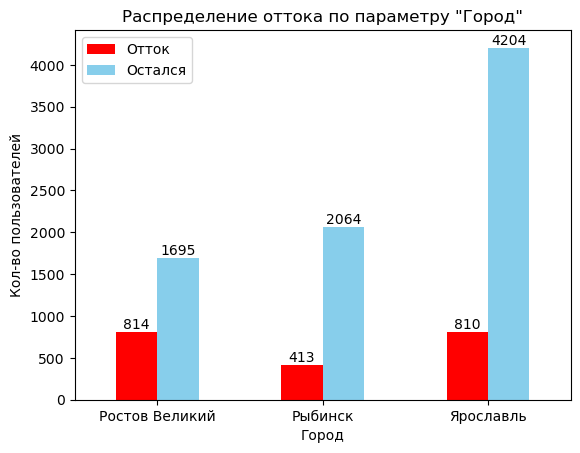

_________________________________________________________________________________________________


Пол,Отток,Всего,Остался,% оттока
Ж,1139,4543,3404,25.071539
М,898,5457,4559,16.455928


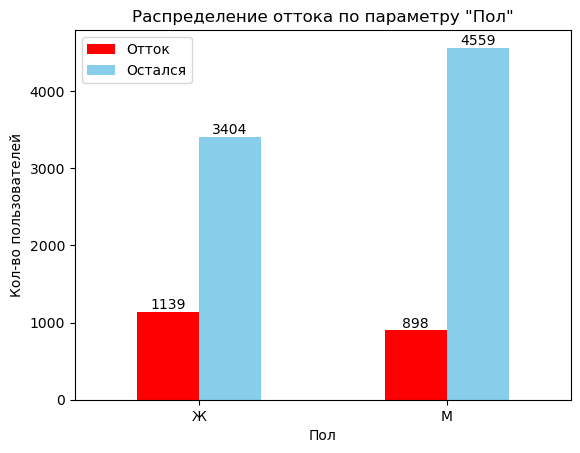

_________________________________________________________________________________________________


Кол-во объектов собственности,Отток,Всего,Остался,% оттока
0,95,413,318,23.002421
1-3,646,3092,2446,20.892626
4-6,608,2968,2360,20.485175
7+,688,3527,2839,19.506663


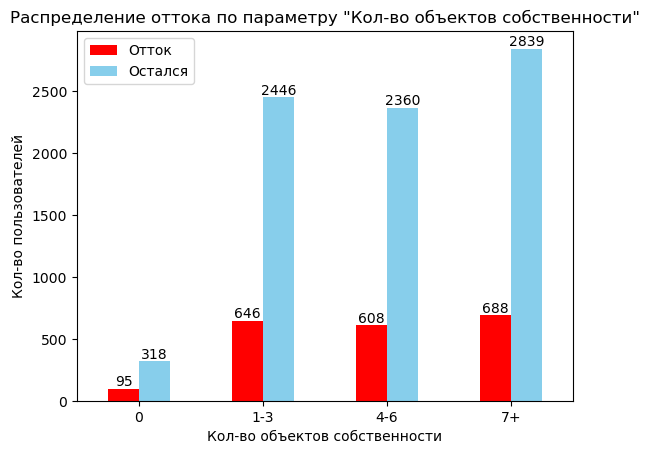

_________________________________________________________________________________________________


Кол-во используемых продуктов,Отток,Всего,Остался,% оттока
1,1409,5084,3675,27.714398
2,348,4590,4242,7.581699
3,220,266,46,82.706767
4,60,60,0,100.000000


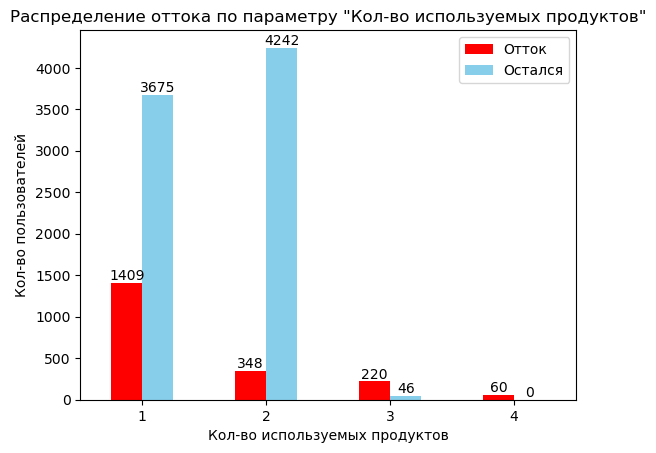

_________________________________________________________________________________________________


Наличие кредитной карты,Отток,Всего,Остался,% оттока
0,613,2945,2332,20.814941
1,1424,7055,5631,20.184266


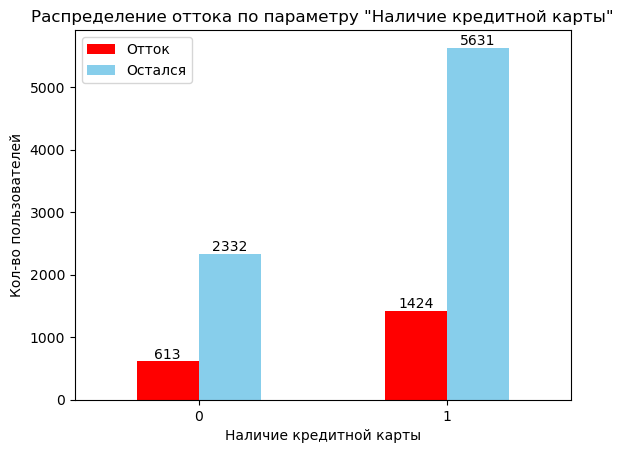

_________________________________________________________________________________________________


Лояльность,Отток,Всего,Остался,% оттока
0,1302,4849,3547,26.850897
1,735,5151,4416,14.269074


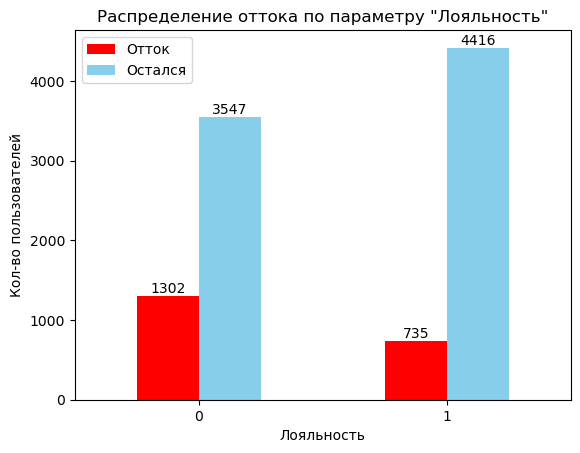

_________________________________________________________________________________________________


In [21]:

for i in data_c.columns[:6]:

    dg = data_c[[i,'Отток']].groupby(i, as_index = False).agg({'Отток':['sum','count']})
    dg.columns = [i, 'Отток','Всего']
    dg['Остался'] = dg['Всего'] - dg['Отток']
    dg['% оттока'] = dg['Отток'] / dg['Всего'] *100
    display(dg.style.hide(axis='index'))   

    p = dg[[i,'Отток', 'Остался']].plot(kind='bar',x = i, color=['red', 'skyblue'])
    plt.title(f'Распределение оттока по параметру "{i}"')
    plt.xlabel(i)
    plt.ylabel('Кол-во пользователей')
    plt.bar_label(p.containers[0])
    plt.bar_label(p.containers[1])
    plt.xticks(rotation=0)
    plt.show()
    print('_________________________________________________________________________________________________')

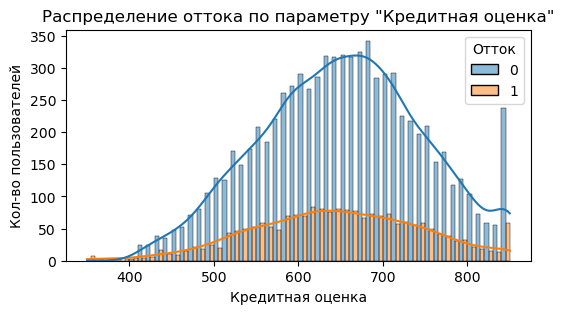

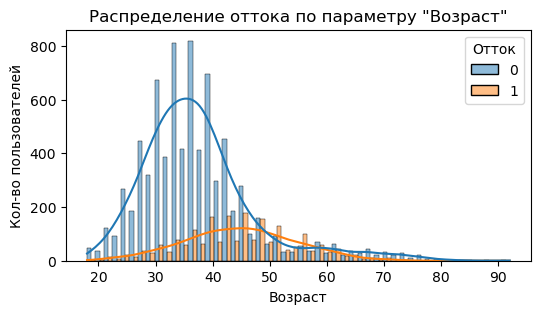

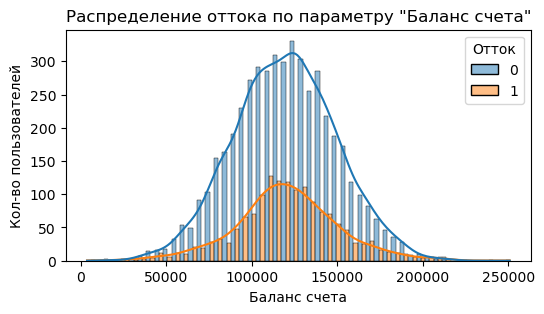

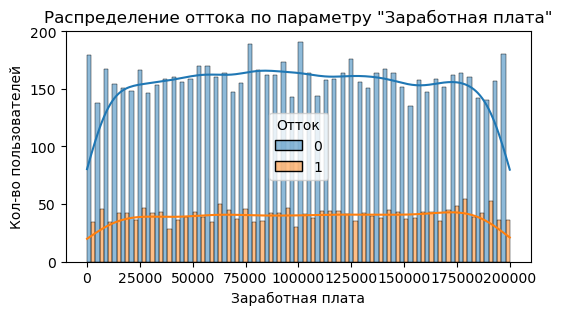

In [22]:
data_n = data[['score','age','balance','estimated_salary','churn']]
data_n.columns = ['Кредитная оценка','Возраст','Баланс счета','Заработная плата','Отток']

for i in data_n.columns[:4]:
    
    dg = data_n[[i,'Отток']]
    plt.figure(figsize=(6, 3))
    p = sns.histplot(x = dg[i] , multiple = 'dodge', hue = dg['Отток'], bins = 50, kde = True)
    plt.title(f'Распределение оттока по параметру "{i}"')
    plt.xlabel(i)
    plt.ylabel('Кол-во пользователей')
    plt.xticks(rotation=0)
    plt.show()    

По городам стоит обратить внимание на Ростов Великий - отток в 2 раза выше, чем в остальных городах. 32% против 16%.

У женщин отток почти на 8,5% выше, чем у мужчин. 25% против 16.5%.

По кол-во объектов в собственности вряд ли можно сделать какой-то вывод.

В кол-ве используемых продуктов у три и четыре выборка небольшая и возможно не репрезентативная, однако очень плохой показатель 83% и 100% оттока соотвественно. Стоит обратить внимание. У пользователей одного продукта отток 27% выше среднего по выборке на 7%. Лучше всего показатели у пользователей, что используют два продукта.

Наличие кредитной карты не влияет на отток.

Лояльность снижает шанс оттока с 27% до 14%

По кредитной оценке сложно что-то сказать, но можно сказать - меньше всего оттока у клиентов от 550 до 750, причем от 600 до 700 отток ниже даже, чем на максимальных 850 баллах.

По возрасту можно сказать, что пик отказов приходится примерно на 45 лет, при это начиная с 40 лет общее кол-во клиентов начинает падать, соотвественно начиная с 45 лет начинается тенденция к увеличению кол-ва отказов в процентном соотношении, и чем старше клиент, тем ситуация становится хуже.

Баланс счета слабо влияет на отток, но можно сказать, что хоть кол-во "уходящих" больше всего между 100 и 150 тыс. на счету, на самом деле это наиболее стабильный сегмент в процентном соотношении ушедних там будет меньше всего.

По параметру заработная плата тоже сложно что-то сказать, никакой особой зависимости нет. Можно сказать, что дела хуже ближе к 0 и 200 тыс., но это скорее всего особенность распределения.

## Сегментация пользователей на основе данных о количестве потребляемых продуктов

In [23]:
data_np = data[['score', 'age','balance','estimated_salary','churn','products']]
data_np.columns = ['кредитная оценка', 'возраст','Баланс счета', 'Заработная плата', 'Отток', 'Кол-во продуктов'] 
data_np.loc[data_np['Кол-во продуктов'].isin([3,4]), 'Кол-во продуктов'] = 3

Распределение оттока


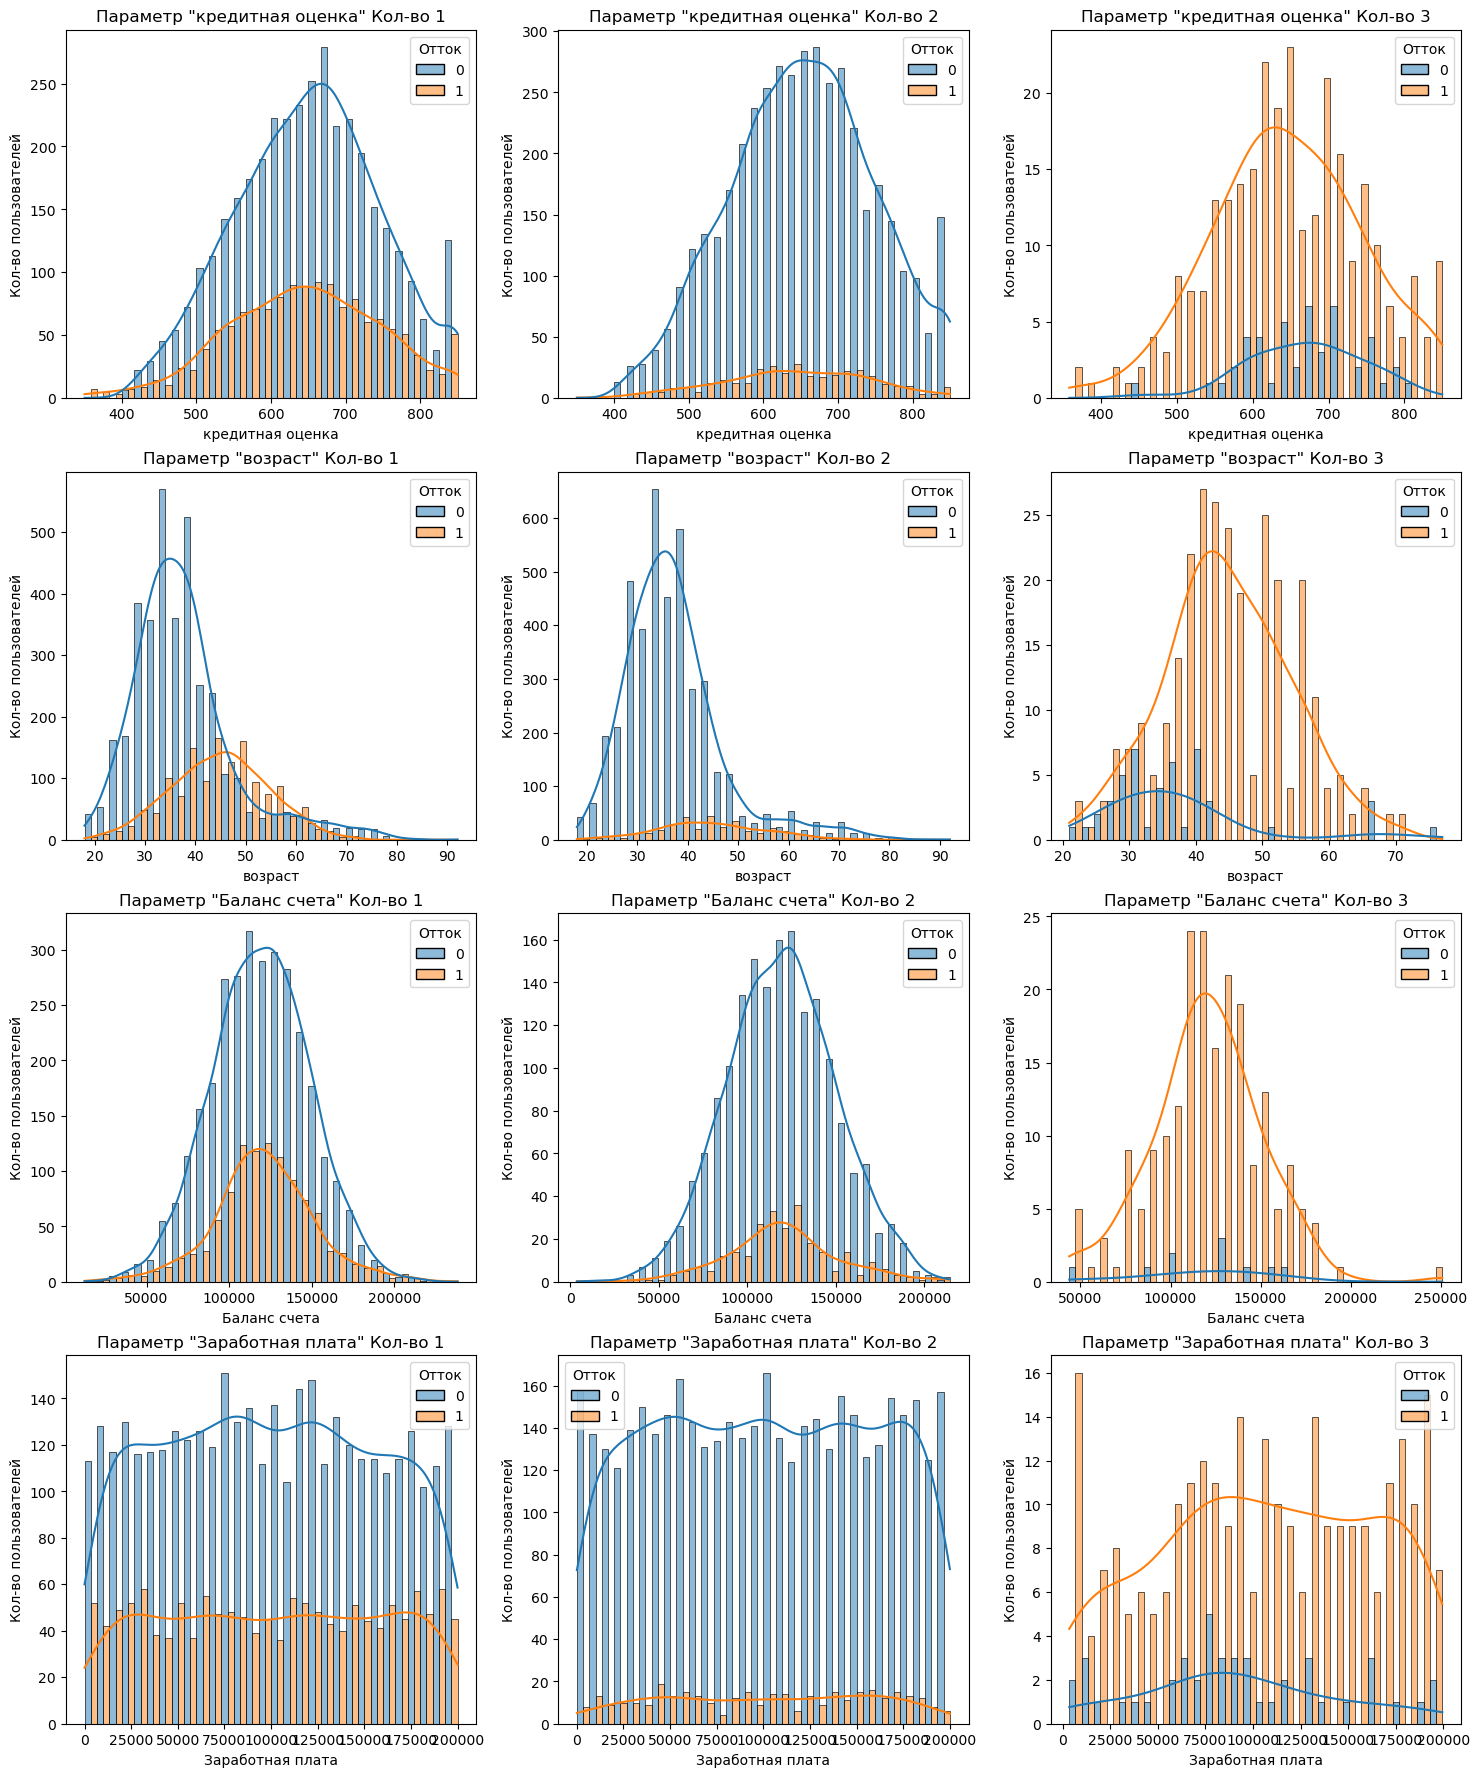

In [24]:
n = 0
plt.figure(figsize=(18, 22))
print('Распределение оттока')
for c in data_np.columns[:data_np.columns.nunique()-2]:
    for i in sorted(data_np['Кол-во продуктов'].unique()):
        n += 1
        plt.subplot(4,3,n)
        sns.histplot(data = data_np[data_np['Кол-во продуктов'] == i], x = c, hue = 'Отток', bins = 30,multiple='dodge', kde = True)
        plt.title(f'Параметр "{c}" Кол-во {i}')
        plt.xlabel(c)
        plt.ylabel('Кол-во пользователей')

In [35]:
data_cp = data[['city', 'gender','creditcard','loyalty','objects','churn','products']]
data_cp.columns = ['Город', 'Пол','Кредитная карта', 'Лояльность', 'Объекты','Отток', 'Кол-во продуктов'] 
data_cp.loc[data_cp['Кол-во продуктов'].isin([3,4]), 'Кол-во продуктов'] = 3

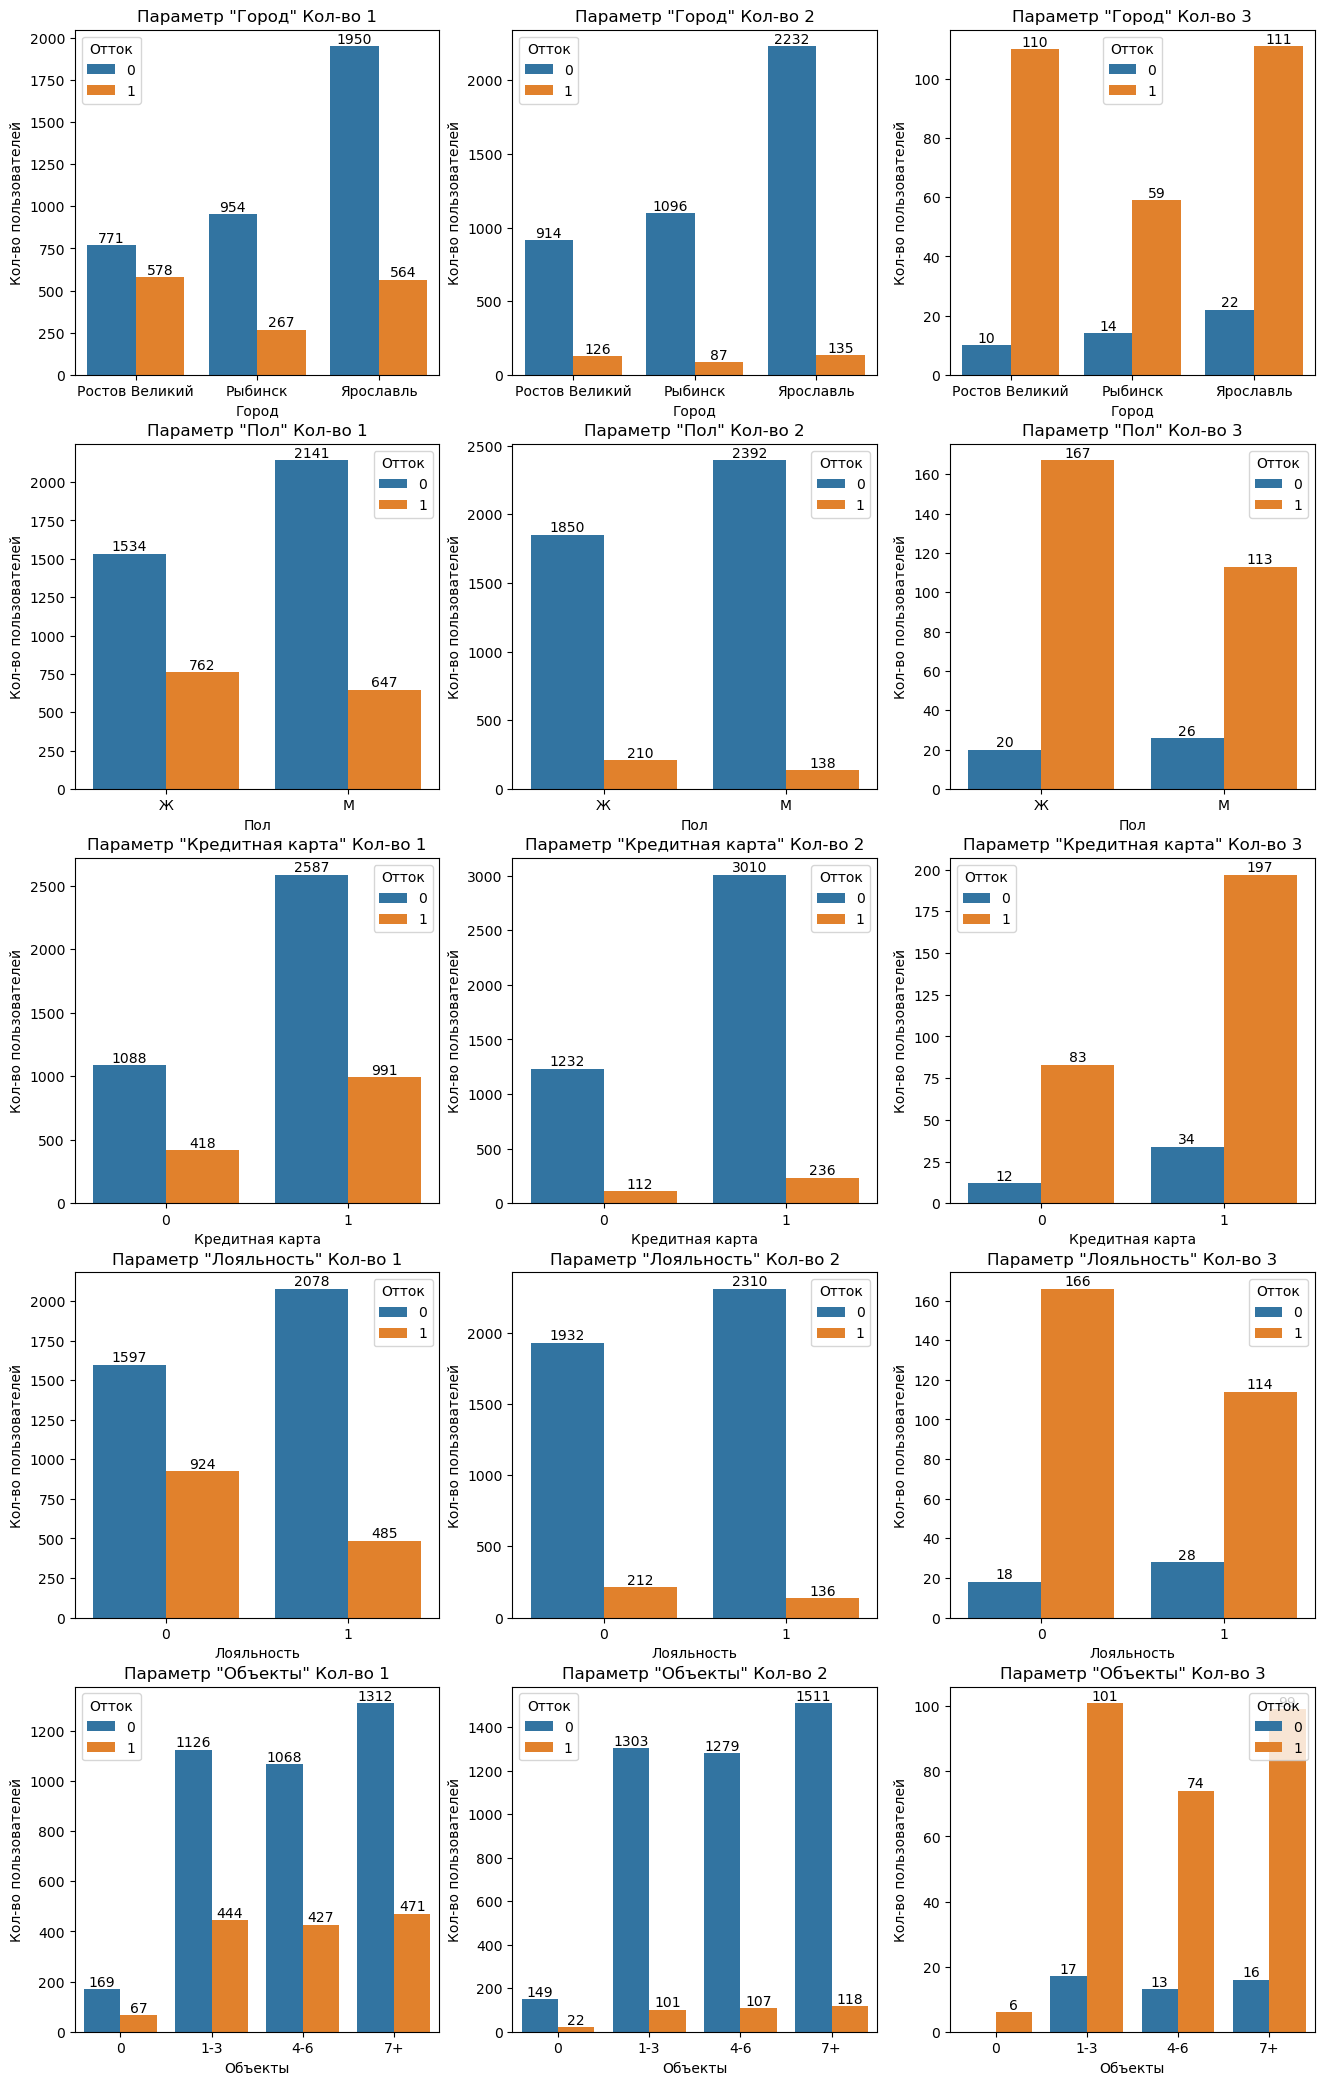

In [39]:
n = 0
plt.figure(figsize=(16, 26))
for c in data_cp.columns[:data_cp.columns.nunique()-2]:      
    for i in sorted(data_cp['Кол-во продуктов'].unique()):
        n += 1      
        gd_cp = data_cp[data_cp['Кол-во продуктов'] == i][[c,'Отток','Кол-во продуктов']].groupby([c,'Отток'], as_index = False).agg({'Кол-во продуктов':['count']})
        gd_cp.columns = [c ,'Отток','Остался']
        plt.subplot(5,3,n)
        p = sns.barplot(x = gd_cp[c], y = gd_cp['Остался'], hue = gd_cp['Отток'])
        plt.bar_label(p.containers[0])
        plt.bar_label(p.containers[1])
        plt.title(f'Параметр "{c}" Кол-во {i}')
        plt.xlabel(c)
        plt.ylabel('Кол-во пользователей')        

In [70]:
'''
for c in data_cp.columns[:data_cp.columns.nunique()-2]:         
        gd_cp = data_cp[data_cp['Кол-во продуктов'] == 2][[c,'Отток','Кол-во продуктов']].groupby(c, as_index = False).agg({'Отток':['count','sum']})
        gd_cp.columns = [c ,'Всего','Отток']
        gd_cp['% оттока'] = gd_cp['Отток'] / gd_cp['Всего'] *100
        gd_cp['% от общего'] = gd_cp['Всего'] / gd_cp['Всего'].sum() *100
        display(gd_cp)
        '''

"\nfor c in data_cp.columns[:data_cp.columns.nunique()-2]:         \n        gd_cp = data_cp[data_cp['Кол-во продуктов'] == 2][[c,'Отток','Кол-во продуктов']].groupby(c, as_index = False).agg({'Отток':['count','sum']})\n        gd_cp.columns = [c ,'Всего','Отток']\n        gd_cp['% оттока'] = gd_cp['Отток'] / gd_cp['Всего'] *100\n        gd_cp['% от общего'] = gd_cp['Всего'] / gd_cp['Всего'].sum() *100\n        display(gd_cp)\n        "

Совместим сегмент с кол-вом продуктов 3 и 4 в один сегмент '3 и более продуктов'

**Сегмент с кол-вом продуктов 1**

Сегмент характеризуется средним оттоком в 28%
Кредитная карта есть у 70% пользователей, но ее наличие не влияет на отток.

Кредитная оценка пользователей, уходящих в отток,  в данном сегменте достаточна высокая (600-700 пунктов).

Стабильный возрастной фонд данного сегмента 25-35 лет, больше всего пользователей, меньше всего оттока.
Пик оттока приходится на ~50 лет, после 40 начинаются проблемы с кол-вом пользователей.
Итогое в районе 45 и до 60 образуется отток станосится больше, чем пользователей, которые остаются.

Основной отток идет по пользователяем с балансом 100-150 тыс.

В Ярославе больше всего пользователей (половина от общего числа), в Ростове отток пользователей составляет более 43% в 2 раза выше остальных городов.

Мужчин больше - 54%, чем женщин, но отток выше у женского пола на (33% против 23%).

У лояльных клиентов отток ниже в 2 раза и лояльных примерно половина.

Кол-во объектов не влияет на отток, много клиентов с 7 и более объектами.

**Сегмент с кол-вом продуктов 2**

Сегмент характеризуется низким средним оттоком в 7,5%
Кредитная карта есть у 70% пользователей,  ее наличие положительно влияет на снижение оттока.

Основной возраст сегмента 30-45 лет. Пик оттока приходится на 40-50, но он не выглядит особо критичным.
Но так же имеется тенденция на снижение общего кол-ва пользователей после 45%.

В Ярославе больше всего пользователей (более половины от общего числа).
в Ростове отток пользователей составляет более 43% в 2 раза выше остальных городов.

Мужчин больше - 55%, чем женщин, но отток выше в 2 раза у женского пола (10% против 5%).

У лояльных клиентов отток ниже в 2 раза и лояльных клиентов больше половины - 53%.

У клиентов без объектов в собственности отток больше среднего на 5% (12%)

**Сегмент с кол-вом продуктов 3 и более**

Сегмент не является репрезентативным, слишком мало данных, слишком большой отток.
Средний отток по сегменту приближается к 90%

Кредитная карта есть у 70% пользователей,  ее наличие положительно влияет на снижение оттока.

Основной отток в возрасте от 40 до 60 лет.

В Ярославе больше всего пользователей, но по сравнению с другими сегментами их меньше - всего 40%
в Ростове отток пользователей составляет более 90% (!!!), при том что пользователей почти такое же кол-во как в Ярославле (36% от общего). Отток в Ярославле и Рябинске ~80%

Женщин больше - 57%, и отток у них выше (89% против 81%).

У лояльных клиентов отток ниже (80% против 90%) и лояльных клиентов меньше половины - 44%.

У клиентов без объектов в собственности отток 100%, больше среднего в 85%

## Формулировка и проверка гипотез

### Гипотеза 1 - различия возраста между клиентами с одним и двумя продуктами

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Примем H0 - различий нет и H1 - различия есть. Использовать будем непараметрический тест Уилкоксона-Манна-Уитни.

In [27]:
cluster_1 = data[data['products'] == 1][['age']]
cluster_2 = data[data['products'] == 2][['age']]
alpha = 0.05

results = st.mannwhitneyu(cluster_1, cluster_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  [1.24818598e-22]
Отвергаем нулевую гипотезу: разница статистически значима


Отвергаем нулевую гипотезу - различия в возрасте есть

### Гипотеза 2 - различие оттока между клиентами с кредитной картой и без кредитной карты.

Проверим гипотезу различия оттока между клиентами с кредитной картой и без нее.
Примем H0 - различий нет и H1 - различия есть. Использовать будем Z-тест.

In [28]:
trials1 = data[data['creditcard'] == 1]['churn'].count()
successes1 = data[data['creditcard'] == 1]['churn'].sum()
trials0 = data[data['creditcard'] == 0]['churn'].count()
successes0 = data[data['creditcard'] == 0]['churn'].sum()

alpha = 0.05 

p1 = successes0 / trials0
p2 = successes1 / trials1
p_combined = (successes0 + successes1) / (trials0 + trials1)
difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials0 + 1/trials1))
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.475365355970657
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Не отвергаем нулевую гипотезу - различий оттока между людьми с кредитной картой и без - нет

 ## Формирование данных и запуск дашборда

1. Построить диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавить индикатор процента ушедших клиентов.
3. Добавить фильтр дашборда по городу.

In [29]:
dashboard_banks = data[['products','city','churn']].groupby(['products','city'], as_index = False).agg({'churn':['sum','count']})
dashboard_banks.columns = ('Кол-во продуктов','Город','Отток','Всего')
dashboard_banks['% Оттока'] = dashboard_banks['Отток'] / dashboard_banks['Всего'] * 100
dashboard_banks.to_csv('dashboard_banks.csv', index=False)
dashboard_banks

,Кол-во продуктов,Город,Отток,Всего,% Оттока
0,1,Ростов Великий,578,1349,42.846553
1,1,Рыбинск,267,1221,21.867322
2,1,Ярославль,564,2514,22.434368
3,2,Ростов Великий,126,1040,12.115385
4,2,Рыбинск,87,1183,7.354184
5,2,Ярославль,135,2367,5.703422
6,3,Ростов Великий,86,96,89.583333
7,3,Рыбинск,52,66,78.787879
8,3,Ярославль,82,104,78.846154
9,4,Ростов Великий,24,24,100.000000


Ссылка на дашборд:
https://public.tableau.com/app/profile/pavel8505/viz/-_16805283893940/Sheet1?publish=yes

## Выводы и рекомендации по удержанию

### Сегмент с кол-вом продуктов 1

Сегмент характеризуется средним оттоком в 28%
Кредитная карта есть у 70% пользователей, но ее наличие не влияет на отток.

Стабильный возрастной фонд данного сегмента 25-35 лет, больше всего пользователей, меньше всего оттока.
Пик оттока приходится на ~50 лет, после 40 начинаются проблемы с кол-вом пользователей.
Итогое в районе 45 и до 60 образуется отток станосится больше, чем пользователей, которые остаются.

В Ярославе больше всего пользователей (половина от общего числа), в Ростове отток пользователей составляет более 43% в 2 раза выше остальных городов.

Мужчин больше - 54%, чем женщин, но отток выше у женского пола на (33% против 23%).

У лояльных клиентов отток ниже в 2 раза и лояльных примерно половина.

Кол-во объектов не влияет на отток, много клиентов с 7 и более объектами.

**Рекомендации:**

В данном сегменте пользователи используют только 1 продукт, в 70% случаев это кредитная карта.
Основное направление для данного сегмента это переход пользователя в сегмент с 2 продуктами, который более лоялен и стабилен.

Рекомендовать 30% процентам пользователей, которые не пользуются кредитной картой, кредитную карту, т.к. она положительно влияет на отток в остальных сегментах, по крайней мере точно не делает хуже.

Пользователям, уже имеющим и активно использующим кредитную карту, можно порекомендовать взять полноценный кредит.

Нужно увеличить кол-во пользователей в возрасте 40-45 и старше, а так же улучшить их удержание.
Можно порекомендовать продукты для предпенсионного возраста и старшего возраста - накопительные счета и вклады.
Возможно открытие Негосударственного пенсионного фонда.


### Сегмент с кол-вом продуктов 2

Сегмент характеризуется низким средним оттоком в 7,5%
Кредитная карта есть у 70% пользователей,  ее наличие положительно влияет на снижение оттока.

Основной возраст сегмента 30-45 лет. Пик оттока приходится на 40-50, но он не выглядит особо критичным.
Но так же имеется тенденция на снижение общего кол-ва пользователей после 45%.

В Ярославе больше всего пользователей (более половины от общего числа).
в Ростове отток пользователей составляет более 43% в 2 раза выше остальных городов.

Мужчин больше - 55%, чем женщин, но отток выше в 2 раза у женского пола (10% против 5%).

У лояльных клиентов отток ниже в 2 раза и лояльных клиентов больше половины - 53%.

У клиентов без объектов в собственности отток больше среднего на 5% (12%)

**Рекомендации:**

В данном сегменте лучшее удержание клиентов, нужно определить продукт, который используется больше частью пользователей.
Далее этот продукт можно рекомендовать пользователям в сегменте с 1 продуктом. С сегментом с 2 продуктами нужно работать аккуратно, т.к. навязывание лишних продуктов может привести к оттоку пользователя, что видно по сегменту с 3+ продуктами.

Так же стоит увеличить кол-во пользователей в возрасте 40-45 и старше, а так же улучшить их удержание. Можно порекомендовать продукты для предпенсионного возраста и старшего возраста - накопительные счета и вклады. Возможно открытие Негосударственного пенсионного фонда.

Есть динамика по оттоку клиентов без объектов в собственности, есть вариант выдавать ипотеку или кредит на авто под хороший процент.

Рекомендовать 30% процентам пользователей, которые не пользуются кредитной картой, кредитную карту, т.к. она положительно влияет на отток, по крайней мере точно не делает хуже. Пользователям без карт можно предложить дебетовую.


### Сегмент с кол-вом продуктов 3 и более

Сегмент не является репрезентативным, слишком мало данных, слишком большой отток.
Средний отток по сегменту приближается к 90%

Кредитная карта есть у 70% пользователей,  ее наличие положительно влияет на снижение оттока.

Основной отток в возрасте от 40 до 60 лет.

В Ярославе больше всего пользователей, но по сравнению с другими сегментами их меньше - всего 40%
в Ростове отток пользователей составляет более 90% (!!!), при том что пользователей почти такое же кол-во как в Ярославле (36% от общего). Отток в Ярославле и Рыбинске ~80%

Женщин больше - 57%, и отток у них выше (89% против 81%).

У лояльных клиентов отток ниже (80% против 90%) и лояльных клиентов меньше половины - 44%.

У клиентов без объектов в собственности отток 100%, больше среднего в 85%

**Рекомендации:**

Нужно еще раз повтоить, что сегмент не является репрезентативным.
Хорошей идей будет провести отдельное иследование по сегментам с 3 и более продуктами.
Кажется вероятным, что отток формируется не совсем верно, возможно в отток попадают клиенты, которые меняют один продукт на другой или просто переходят из сегмента с 3 продуктами в сегмент с 2.

Однако стоит отметить Ростов, более трети клиентов данного сегмента находится в этом городе (36%).
Нужно проверить работу отдела в Ростове, возможно клиентам слишком сильное навязывают услуги/продукты.


### Дополнительные рекомендации

Обратить внимание на сбор информации в Ярославе и Рыбинке, большая часть данных по балансу отсутствует.

Обратить внимание на работу отделения в Ростове, большой отток по всем сегментам.

Поработать с женской аудиторией, возможно заинтересовать женщин каким-то спец предложениями на праздники (типо 8 марта).
Если проводятся рек. кампании, то можно сделать лицом банка женщину, либо артиста, который пользуется спросом у женщин.

## Презентация

Ссылка на PDF: https://dropmefiles.com/SvcCT

еще ссылка на pdf: https://drive.google.com/file/d/1991wo0vslbImRVukpLI4zIn3awd09upP/view?usp=sharing

Ссылка на G.docs: https://docs.google.com/presentation/d/15VThH6ZdehMZ91dqDFSXErhQD21ZMeEyhmB4IkbThKo/edit#slide=id.p